# Reconhecimento de Dígitos
## 1. Preparação do Ambiente

In [9]:
import os
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [10]:
TEST_DATA_PATH = ('dados/test.csv')
TRAIN_DATA_PATH = ('dados/train.csv')
data_test_df = pd.read_csv(TEST_DATA_PATH, sep=';')
data_train_df = pd.read_csv(TRAIN_DATA_PATH, sep=';')

## 2. Redução da dimensão das amostras
### 2.1. Intensidade da imagem

In [11]:
def calcular_intensidade(row):
    pixelx = row[3:]
    intensidade = pixelx.sum() / 255
    return intensidade 

data_train_df['intensidade'] = data_train_df.apply(calcular_intensidade, axis=1)
data_test_df['intensidade'] = data_test_df.apply(calcular_intensidade, axis=1)

### 2.2. Simetria da imagem

In [12]:
def calcular_simetria(row):
    pixels = row[2:].values.reshape(28, 28)  # Ignora o label e reformata para 28x28
    simetria_vertical = 0
    simetria_horizontal = 0
    
    for i in range(28):
        for j in range(14):
            simetria_vertical += abs(pixels[i][j] - pixels[i][27 - j])

    for j in range(28):
        for i in range(14):
            simetria_horizontal += abs(pixels[i][j] - pixels[27 - i][j])
    
    simetria_completa = simetria_vertical + simetria_horizontal
    simetria_completa /= (255 * 28 * 14 * 2)
    return simetria_completa

data_train_df['simetria'] = data_train_df.apply(calcular_simetria, axis=1)
data_test_df['simetria'] = data_test_df.apply(calcular_simetria, axis=1)

In [13]:
colunas_relevantes = ['label', 'intensidade', 'simetria']
TEST_REDU_DATA_PATH = ('dados/test_redu.csv')
TRAIN_REDU_DATA_PATH = ('dados/train_redu.csv')

if not os.path.isfile(TEST_REDU_DATA_PATH):
    data_test_df[colunas_relevantes].to_csv('test_redu.csv', index=False)
    
if not os.path.isfile(TRAIN_REDU_DATA_PATH):
    data_train_df[colunas_relevantes].to_csv('train_redu.csv', index=False)

In [14]:
data_test_redu_df = pd.read_csv(TEST_REDU_DATA_PATH)
data_train_redu_df = pd.read_csv(TRAIN_REDU_DATA_PATH)

## 3. Classificação dos dígitos 1x5
### 3.1. Filtragem dos dados

In [15]:
data_test_redu_filtered_df = data_test_redu_df[(data_test_redu_df['label'] == 1) | (data_test_redu_df['label'] == 5)]
data_train_redu_filtered_df = data_train_redu_df[(data_train_redu_df['label'] == 1) | (data_train_redu_df['label'] == 5)]

### 3.2. Plotagem de dados de train1x5

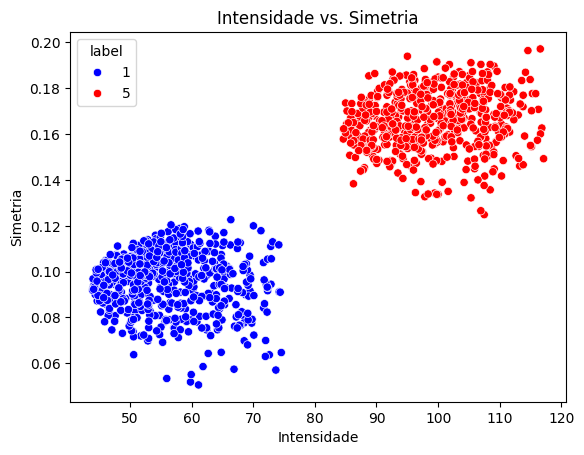

In [16]:
def plotagem_grafico(data_train_redu_filtered_df):
    sns.scatterplot(data=data_train_redu_filtered_df, x='intensidade', y='simetria', hue='label', palette={1: 'blue', 5: 'red'})
    plt.title('Intensidade vs. Simetria')
    plt.xlabel('Intensidade')
    plt.ylabel('Simetria')
    plt.show()
    
plotagem_grafico(data_train_redu_filtered_df)